In [0]:
#LOADING DATA

!git clone https://github.com/thatbrguy/Dropbox-Uploader.git

Cloning into 'Dropbox-Uploader'...
remote: Enumerating objects: 951, done.
remote: Total 951 (delta 0), reused 0 (delta 0), pack-reused 951
Receiving objects: 100% (951/951), 309.20 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [0]:
cd Dropbox-Uploader

/content/Dropbox-Uploader


In [0]:
!chmod +x dropbox_uploader.sh
!bash dropbox_uploader.sh



 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader300222500110599)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [0]:
!echo "xO7ZN9X-ToAAAAAAAAAASBtUoCbS_NDfM-ukxdcFc0Nw1ST303tE-nTdXezTqT6V" > token.txt

In [0]:
!bash dropbox_uploader.sh download Toucan

 > Downloading folder "/Toucan" to "/content/Dropbox-Uploader/Toucan"... 
 > Creating local directory "/content/Dropbox-Uploader/Toucan"... DONE
 > Downloading "/Toucan/test-inputs.txt" to "/content/Dropbox-Uploader/Toucan/test-inputs.txt"... DONE
 > Downloading "/Toucan/testData.xlsx" to "/content/Dropbox-Uploader/Toucan/testData.xlsx"... DONE
 > Downloading "/Toucan/testData.csv" to "/content/Dropbox-Uploader/Toucan/testData.csv"... DONE
 > Downloading "/Toucan/toucantest.csv" to "/content/Dropbox-Uploader/Toucan/toucantest.csv"... DONE


In [0]:
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

In [0]:
#PROD FILE: CSV TO DF

origdf = pd.read_csv('Toucan/testData.csv')
origdf.dropna(axis = 1, how = 'all', inplace = True)

In [0]:
len(origdf)

4061

## **EXPLORATORY DATA ANALYSIS**

In [0]:
import seaborn as sns
import matplotlib as plt

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


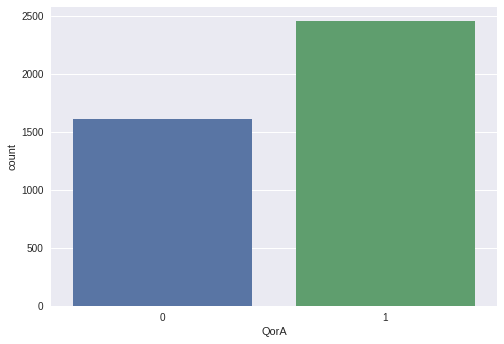

In [0]:
sns.countplot(x = origdf['QorA'], data = origdf)
# 0 is Statement
# 1 is Question

## **Text Pre-processing Functions**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:

#START WITH COUNTVECTORIZER
def cvectorizer(origdf):
  vectorizer = CountVectorizer()
  vectorizer.fit(origdf['Sentence'])
  vector = vectorizer.fit_transform(origdf.Sentence)
  print(vector.shape)
  print(vectorizer.vocabulary_)
  v = vector.todense()
  vecountdf = pd.DataFrame(v, columns = vectorizer.get_feature_names())
  whole = pd.concat([origdf, vecountdf], axis = 1)
  return whole, vecountdf

In [0]:
def tfidfvector(origdf):
  vectorizertfidf = TfidfVectorizer()
  vtfidf = vectorizertfidf.fit_transform(origdf['Sentence'])
  v = vtfidf.todense()
  origtfidfrest = pd.DataFrame(v, columns = vectorizertfidf.get_feature_names())
  return origtfidfrest

## **Data Set Splitting Functions**

In [0]:
#SPLIT PROD FILE INTO TRAIN, TEST, VALIDATION SECTIONS

def threeSplit_DataSet(whole):
  train, validate, test = np.split(whole.sample(frac = 1), [int(0.6*len(whole)), int(0.8*len(whole))])
  return train, validate, test

In [0]:
def threeSplit_SortData(train, test, validate):
  train_q = train['Sentence']
  test_q = test['Sentence']
  val_q = validate['Sentence']
  train_rest = train.copy().drop(['Sentence','QorA'], axis = 1)
  test_rest = test.copy().drop(['Sentence','QorA'], axis = 1)
  val_rest = validate.copy().drop(['Sentence','QorA'], axis = 1)
  train_ans = train['QorA']
  test_ans = test['QorA']
  val_ans = validate['QorA']
  return train_q, test_q, val_q, train_rest, test_rest, val_rest, train_ans, test_ans, val_ans

In [0]:
#COMPARING 3 SET DATA WITH 10-FOLD CROSS-VALIDATION
## use 'whole' dataset 
def tenfold(x_train, x_test, y_train, y_test, clf):
  #x_train, x_test, y_train, y_test = train_test_split(vecountdf, origdf['QorA'], test_size = 0.33)
  p = {}
  clfgrid = GridSearchCV(clf,p, cv=10)
  clfgrid.fit(x_train, y_train)
  x_pred = clfgrid.predict(x_test)
  return x_pred


## **Estimator Functions**

In [0]:
def MNB(train_features, train_y, val_features, test_features, val_y, test_y, test_x):
  clf = MultinomialNB()
  training_model = clf.fit(train_features, train_y)
  clf.fit(train_features, train_y)
  clf.fit(val_features, val_y)
  
  predicted_val = clf.predict(val_features)
  predicted_test = clf.predict(test_features)
  
  predtest = pd.DataFrame(data = predicted_test, index = test_y.index)   #,index = 'default', columns = 'train_predict')\
  predtest['Sent'] = test_x
  return clf, predicted_val, predicted_test, predtest, training_model
  

In [0]:
def logregression(x_train, y_train, x_test):
  clf = LogisticRegression(random_state=0, solver = 'liblinear', multi_class = 'ovr').fit(x_train, y_train)
  clf.predict(x_test)
  return clf
  
#1. look through scikitlearn doc for log regression : implement
#2. try creating another file: adding more sentences so that evens out sentences vs questions:: more evened out dataset
#3. log regression with tfidf, 10 fold dataset
#4. try Glove embeddings 

## **Model Validation Fucnctions**

In [0]:
def confMatrix(y_test, x_pred):
  tn, fp, fn, tp = confusion_matrix(y_test, x_pred).ravel()
  cm_acc = (tp+fn)/(tn+fp+fn+tp)
  return cm_acc

1st Model: CV + 3 fold data split + MNB + confusion Martix

In [0]:
whole1, vecountdf = cvectorizer(origdf)

(4061, 6483)
{'did': 1800, 'his': 2901, 'mother': 3833, 'die': 1803, 'of': 4071, 'pneumonia': 4413, 'is': 3177, 'it': 3191, 'derived': 1749, 'from': 2554, 'the': 5792, 'latin': 3360, 'spoken': 5430, 'by': 1017, 'romanized': 4982, 'pre': 4490, 'roman': 4977, 'peoples': 4279, 'iberian': 2990, 'peninsula': 4275, 'namely': 3895, 'gallaeci': 2587, 'lusitanians': 3555, 'celtici': 1130, 'and': 486, 'conii': 1423, 'around': 592, '2000': 159, 'years': 6446, 'ago': 401, 'why': 6345, 'bequerel': 820, 'win': 6362, 'nobel': 3992, 'prize': 4555, 'in': 3034, 'physics': 4341, 'where': 6329, 'jakarta': 3208, 'located': 3498, 'screens': 5114, 'but': 1007, 'felt': 2349, 'that': 5791, 'was': 6277, 'too': 5884, 'much': 3860, 'sacrifice': 5028, 'does': 1898, 'order': 4127, 'testudines': 5783, 'not': 4013, 'include': 3038, 'both': 912, 'extant': 2255, 'lrb': 3545, 'living': 3487, 'rrb': 5007, 'extinct': 2263, 'species': 5413, 'earliest': 1983, 'known': 3302, 'turtles': 6011, 'being': 803, '215': 176, 'millio

In [0]:
train1, validate1, test1 = threeSplit_DataSet(whole1)

In [0]:
train_q1, test_q1, val_q1, train_rest1, test_rest1, val_rest1, train_ans1, test_ans1, val_ans1 = threeSplit_SortData(train1, test1, validate1)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
#MULTINOMIAL NAIVE BAYES

clf, predicted_val, predicted_test, predtest, training_model = MNB(train_rest1, train_ans1, val_rest1, test_rest1, val_ans1, test_ans1, test1['Sentence'])


In [0]:
#CHECKING ACCURACY SCORES FOR ALL AND ALL ARE ABOVE 95%

train_acc = accuracy_score(train_ans1, training_model.predict(train_rest1))
val_acc = accuracy_score(val_ans1, predicted_val )
test_acc = accuracy_score(test_ans1, predtest[0]) 
#all above 95%

In [0]:
print("Training Accuracy:", train_acc, "\nValidation Accuracy:", val_acc, "\nTesting Accuracy:", test_acc)

Training Accuracy: 0.9729064039408867 
Validation Accuracy: 0.9987684729064039 
Testing Accuracy: 0.976629766297663


In [0]:
#to test algorithm: use Confusion Matrix

cm_acc = confMatrix(test_ans1, predicted_test)
print("Accuracy from first confusion matrix:", (cm_acc*100),"%")

Accuracy from first confusion matrix: 61.254612546125465 %


2nd model: CV + 10 fold data split + MNB (with GridSearchCV)+ confusion Martix

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(vecountdf, origdf['QorA'], test_size = 0.33)
x_pred1 = tenfold(x_train1, x_test1, y_train1, y_test1, clf)

In [0]:
cm_acc1 = confMatrix(y_test1, x_pred1)
print("Accuracy from second confusion matrix:", (cm_acc1*100),"%")

Accuracy from second confusion matrix: 61.44668158090977 %


3rd model: tfidf + 3 fold split + MNB + confusion matrix

In [0]:
origdf.head()

,Sentence,QorA
0,Did his mother die of pneumonia,1
1,Is it derived from the Latin spoken by the rom...,1
2,Why did Bequerel win the Nobel Prize in Physics,1
3,Where is Jakarta located,1
4,"9 screens, but felt that was too much of a sa...",0


In [0]:
origtfidfrest1 = tfidfvector(origdf)

In [0]:
whole2 = pd.concat([origdf, origtfidfrest1], axis = 1)

In [0]:
train2, test2, validate2 = threeSplit_DataSet(whole2)

In [0]:
train_q2, test_q2, val_q2, train_rest2, test_rest2, val_rest2, train_ans2, test_ans2, val_ans2 = threeSplit_SortData(train2, test2, validate2)

In [0]:
clf2, predicted_val2, predicted_test2, predtest2, training_model2 = MNB(train_rest2, train_ans2, val_rest2, test_rest2, val_ans2, test_ans2, test2['Sentence'])

In [0]:
train_acc2 = accuracy_score(train_ans2, training_model2.predict(train_rest2))
val_acc2 = accuracy_score(val_ans2, predicted_val2 )
test_acc2 = accuracy_score(test_ans2, predtest2[0]) 

In [0]:
print("Training Accuracy:", train_acc2, "\nValidation Accuracy:", val_acc2, "\nTesting Accuracy:", test_acc2)

Training Accuracy: 0.9848111658456487 
Validation Accuracy: 1.0 
Testing Accuracy: 0.9852216748768473


In [0]:
cm_acc2 = confMatrix(test_ans2, predicted_test2)

print("Accuracy from first confusion matrix with tfidf:", (cm_acc2*100),"%")

Accuracy from first confusion matrix with tfidf: 58.49753694581281 %


4th model: tfidf + 10 fold split + MNB (with GridSearchCV)+ confusion matrix

In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(origtfidfrest1, origdf['QorA'], test_size = 0.33)
x_pred2 = tenfold(x_train2, x_test2, y_train2, y_test2, clf)

#y_test2, x_pred2 = tenfold(origtfidfrest1, origdf, clf2)

cm_acc3 = confMatrix(y_test2, x_pred2)

print("Accuracy from second confusion matrix with tfidf:", (cm_acc3*100),"%")

#Conlcusion: 2nd model, seems most efficient

Accuracy from second confusion matrix with tfidf: 59.73154362416108 %


5th Model: CV + 10 fold Data Split + Logistic Regression (with GridSearchCV) + confusion matrix

In [0]:
origdf.head()

clf3 = logregression(x_train1, y_train1, x_test1)
x_pred3 = tenfold(x_train1, x_test1, y_train1, y_test1, clf3)
print(" Accuracy score of 5th model (CV + logistic regression) is",accuracy_score(x_pred3, y))


 Accuracy score of 5th model (CV + logistic regression) is 0.9880686055182699
